In [14]:
from src.local import *
from src.udmis import *

In [15]:
u = 1.35
graph = [
    (0.3461717838632017, 1.4984640297338632),
    (0.6316400411846113, 2.5754677320579895),
    (1.3906262250927481, 2.164978861396621),
    (0.66436005100802, 0.6717919819739032),
    (0.8663329771713457, 3.3876341010035995),
    (1.1643107343501296, 1.0823066243402013)
]

In [16]:
udmis = MPOClassicalUDMIS(u, graph)

In [17]:
udmis.find_edges()

array([[False, False, False,  True, False,  True],
       [False, False,  True, False,  True, False],
       [False,  True, False, False, False, False],
       [ True, False, False, False, False,  True],
       [False,  True, False, False, False, False],
       [ True, False, False,  True, False, False]])

In [18]:
udmis.rand_vertex()

5

In [19]:
udmis.hamiltonian()

Local Hamiltonian Object:
Nsites:		6
Locality:	6

In [20]:
gs = udmis.ground_state()

In [23]:
H = udmis.hamiltonian()


In [27]:
def identity_wrap(operator, num_sites, i):
    operators = [qt.qeye(2) for _ in range(num_sites)]
    operators[i] = operator
    return qt.tensor(operators)

In [33]:
n = 0.5 * (qt.qeye(2)-qt.sigmaz())
nn = qt.tensor(n,n)

In [79]:
Htest = 0 * H.full_operator()

In [81]:
nn

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

In [82]:
basis = {'I': qt.qeye,
         'n': n}

In [55]:
for i in range(udmis.num_vertices):
    Htest += identity_wrap(-n, udmis.num_vertices, i)
    for j in range(i + 1, udmis.num_vertices):
        if udmis.edges[i, j]:
            Htest += udmis.u * identity_wrap(nn, udmis.num_vertices - 1, i)

In [56]:
Htest

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.   -1.    0.   ...  0.    0.    0.  ]
 [ 0.    0.   -1.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.4   0.    0.  ]
 [ 0.    0.    0.   ...  0.    1.75  0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.75]]

In [60]:
H.full_operator() - 1.312 * identity_wrap(qt.qeye(2),6,1)

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[ 5.000e-04  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -9.995e-01  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -9.995e-01 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  4.005e-01  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00 -9.495e-01  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  7.505e-01]]

In [68]:
qt.Qobj(i.data)

TypeError: expected dimension <= 2 array or matrix

In [72]:
qt.Qobj(i.data[0])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.]
 [ 0.]]

In [74]:
sites = []
for i in gs:
    sites.append(qt.Qobj(i.data[0]))
gs_vec = reduce(qt.tensor,sites)

In [76]:
qt.expect(Htest,gs_vec)

-2.0

In [77]:
qt.expect(Htest,psi)

-4.0

In [ ]:
def mps_to_vec(mps):

In [43]:
psi = Htest.groundstate()[1]

In [51]:
for i in range(6):
    print(qt.ptrace(psi,i))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]


In [11]:
qt.basis(2,0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [40]:
H.ground_state()

MatrixProductState(tensors=array([Tensor(data=array([[[1.+0.j],
        [0.+0.j]]]), labels=['left', 'phys', 'right']),
       Tensor(data=array([[[1.+0.j],
        [0.+0.j]]]), labels=['left', 'phys', 'right']),
       Tensor(data=array([[[0.+0.j],
        [1.+0.j]]]), labels=['left', 'phys', 'right']),
       Tensor(data=array([[[-1.+0.j],
        [-0.+0.j]]]), labels=['left', 'phys', 'right']),
       Tensor(data=array([[[0.+0.j],
        [1.+0.j]]]), labels=['left', 'phys', 'right']),
       Tensor(data=array([[[-1.+0.j],
        [-0.+0.j]]]), labels=['left', 'phys', 'right'])], dtype=object), left_label='left', right_label='right',phys_label='phys')

In [34]:
non_locality = 3

In [35]:
string

'ZIIZ'

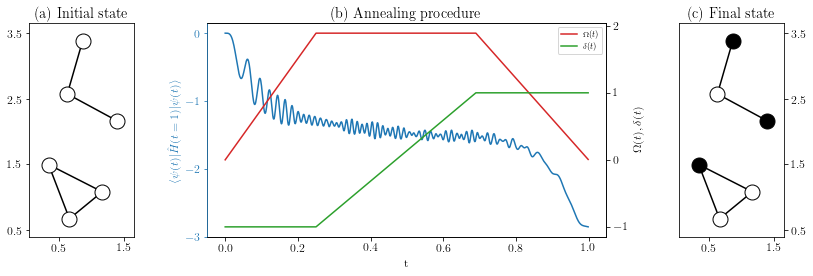

In [3]:
from src.figures import *

fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1, 4), (0, 0))
ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=2)
ax3 = plt.subplot2grid((1, 4), (0, 3))

plot_quantum_udmis(ax1, udmis_init)
plot_quantum_annealing(ax2, np.arange(0, 1, dt), energy, omega, delta)
plot_quantum_udmis(ax3, udmis)

ax1.set_title(r'(a) Initial state')
ax2.set_title(r'(b) Annealing procedure')
ax3.set_title(r'(c) Final state')
ax3.yaxis.tick_right()

fig.tight_layout()

# plt.savefig('../fig/quantum_annealing.pdf')